## Hypothesis tests

We've got a sample of students (our survey). 

We will run the hypothesis test to check whether the mean in the population of students (the process "generating" students) equals 179 cm. 

179 cm benchmark is taken from the centile grid for Warsaw boys: https://adst.mp.pl/img/articles/prawidlowyrozwoj/wzrost_ch_max.jpg



$$H_0: \mu = 179$$

$$H_A: \mu \ne 179$$


Null hypothesis is the hypothesis we reject or fail to reject in a hypothesis test. In this case we verify $\mu = 179$. 

In [1]:
import pandas as pd

csv_url = "https://docs.google.com/spreadsheets/d/1H6b5mkq68MeRQyP0Cr2weCpVkzmpR0c2Oi7p147o2a0/export?format=csv"

# Read the sheet into a DataFrame
d = pd.read_csv(csv_url)

print(d.head())

   height  handedness  right_hand_span  left_hand_span  head_circ eye_colour  \
0     159        0.88             19.0            19.0       54.0       Blue   
1     160       -1.00             19.0            20.0       57.0      Green   
2     161        0.79             17.0            16.5       57.0      hazel   
3     162        0.79             16.0            16.0       57.0       gray   
4     162        0.79             16.0            16.0       54.0      Brown   

   gender  siblings  movies  soda   bedtime       fb_freq  fb_friends  \
0  Female         2     3.0   7.0  02:00:00    once a day       135.0   
1  Female         2     0.5   2.0  04:30:00             0         1.0   
2  Female         3     3.0   2.0  23:50:00   once a week       354.0   
3  Female         2     0.0   2.0  23:10:00  almost never       192.0   
4  Female         2     1.0   3.0  00:00:00         never         1.0   

                  stat_likert  
0  Neither agree nor disagree  
1              S

In [3]:
# Our data is height of males in the sample
data = d['height'][d['gender']=="Male"]
print(data)

13    167
15    168
18    170
20    170
23    173
25    173
26    173
27    174
29    176
30    176
31    176
34    178
35    179
36    179
37    180
38    180
40    180
41    182
42    183
43    183
44    184
45    184
46    185
47    185
48    186
49    186
50    188
51    189
52    189
53    190
54    190
55    190
56    191
57    191
58    195
59    206
Name: height, dtype: int64


In [4]:
import numpy as np
np.mean(data)

np.float64(181.91666666666666)

https://bookdown.org/blazej_kochanski/statistics2/templates-main.html

In [6]:
import scipy.stats as stats

test_result = stats.ttest_1samp(data, popmean=179, alternative='two-sided')

print(test_result)

TtestResult(statistic=np.float64(2.086228658423341), pvalue=np.float64(0.04431130919883513), df=np.int64(35))


I every hypothesis test there is:

1) a null hypothesis

2) an alternative hypothesis

3) a test statistic

4) a p-value

## How does randomness look like -- experiment

Your job is to imagine 100 tosses of the coin, one after another. One side is "O", another "R" (Orzel/Reszka; Head/Tail) etc. Put them on paper, using a pen. Without computers or real coins/other random number generators. 

Put them in sequence, ten tosses in a line, ten lines. The generated tosses should resemble real random tosses. The person, whose tosses are most similar to typical real random tosses wins. 


First toss: "O" - 26 students, "R" - 10 students. 

In [8]:
from scipy.stats import binomtest

result = binomtest(k=26, n=36)
print(result)

BinomTestResult(k=26, n=36, alternative='two-sided', statistic=0.7222222222222222, pvalue=0.011330984183587134)


Pepsi/Coke test from the blog post:
https://blazejkochanski.pl/post/cola/

In [7]:
from scipy.stats import binomtest

result = binomtest(k=11, n=13, alternative='greater')
print(result)

BinomTestResult(k=11, n=13, alternative='greater', statistic=0.8461538461538461, pvalue=0.01123046875)


Let's test correlation between head size and height for Females. 

In [15]:
mask = (d['gender']=="Female") & (d['head_circ'].notna()) & (d['height'].notna())

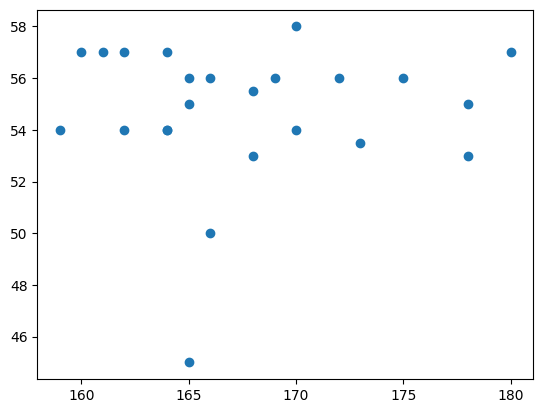

In [20]:
x = d['height'][mask]
y = d['head_circ'][mask]

import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(x, y)
plt.show()

In [23]:
print(x.corr(y))
print(stats.pearsonr(x,y))

0.04923828678795192
PearsonRResult(statistic=np.float64(0.04923828678795198), pvalue=np.float64(0.8192742771663436))


In the correlation test, by default:

$$ H_0: \rho = 0 $$

$$ H_A: \rho \ne 0 $$

p-value ~= 0.82, so we do not reject the null hypothesis. The obtained result (correlation coefficient in the sample ~= 0.05) is not statistically significant. 